# Chapitre 7: apprentissage non supervisé
Apprentissage non supervisé est une méthode au lieu de présenter à la machine dès exemple (x, y), on lui fournit uniquement les données X et on lui demande d'évaluer la structure de ces données X pour apprendre elle même a réalisé certaines tâches.


Par exemple, la machine peut apprendre a classer des données en les regroupant uniquement selon leur ressemblance c'est ce qu'on appelle faire du clustering ou en français de la classification non supervisée.


Une des caractéristiques fondamentales des algorithmes non supervisés est la réduction de la dimensionnalité tout en conservant les principales informations.

La première méthode est le Clustering. Son principe est :

1. Affectation des points de dataset au centre **le plus proche**.
2. déplacement du centre à la moyenne du cluster.

Le problème avec cet algorithme est la position des centroid au début de lancement de l'algorithme c'est pour ça souvent on l'exécute avec différentes positions de départ. la solution retenu est celle qui **minimise** la somme des distances entre les points (x) du cluster et sont centre.

K-means cherche la position des centres qui minimise la distance entre les points d'un cluster (xi) et et sont centre (u). cela équivaut a **minimiser** la variance des clusters.

## 7.1 Clustring KMeans

7.1.1 Application De L'algorithme KMeans

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
import numpy as np

Génération des données 

In [38]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1)

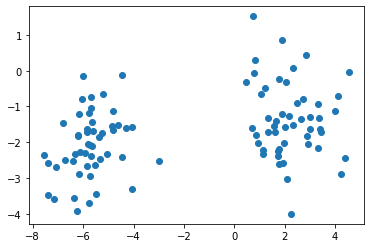

In [39]:
plt.scatter( x[:, 0], x[:, 1])
plt.show()

In [40]:
model=KMeans(n_clusters=3)
model.fit(x)

/Users/amine/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

-149.68011407522428

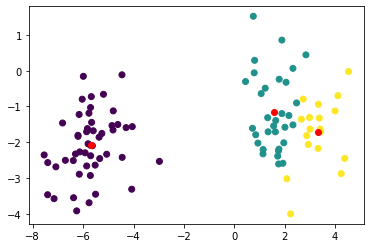

In [41]:
model.predict(x)
plt.scatter(x[:, 0], x[:, 1], c=model.predict(x))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
model.score(x)


Notre objectif est de minimiser le nombre de clusters tout en gardant un meilleur modèle.


In [42]:
#choix du nombre de voisins [ 0 - 50 ]
models= [ KMeans( n_clusters=i).fit(x) for i in np.arange(1, 20)]
#On calcule le score pour chaque modèle génere avec la deuxieme partie de test
inertia =[ model.inertia_ for model in models]

/Users/amine/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/amine/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/amine/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/amine/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/a

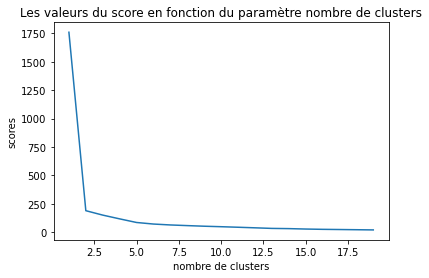

In [43]:
plt.plot(np.arange(1,20), inertia)
plt.xlabel("nombre de clusters")
plt.ylabel("scores")
plt.title('Les valeurs du score en fonction du paramètre nombre de clusters')
plt.show()

On remarque que le meilleur nombre de clusters idéale est 2 est entre .

Le score est de : 188.62962008748383 


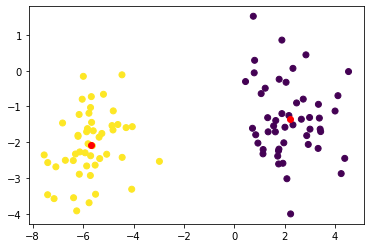

In [44]:
index_model=1#car l'index 0 correspond a n_clusters =1  & l'index 1 corespond a n_clusters =2
model=models[1]
plt.scatter(x[:, 0], x[:, 1], c=model.predict(x))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
print(f"Le score est de : {model.inertia_} ")

### 7.1.2 Détection d'anomalie 
**Methode 1** : - Utilisation de la loi normale


Détection des élément x qui sont des caractéristique très éloigné des autres échantillons:
La méthode la plus facile est d'utiliser la loi normale en calculant la moyenne et écart type des données x pour déterminer une fonction densité de probabilité pour l'utiliser afin de calculer la probabilité de chaque élément x et fixé une certaine probabilité pour dire est ce que l'élément est normale ou anormale


**Methode 2** : - Utilisation de l'algorithme isolation forest


Sont principe est d'effectuer une série de splits aléatoire, et on **Compte** le nombre de splits qu'il faut effectuer pour pouvoir isoler un élément x

Dans SKLearn il suffit de définir le pourcentage de données que vous désirez filtrer( taux de *contamination*)

In [45]:
from sklearn.ensemble import IsolationForest

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


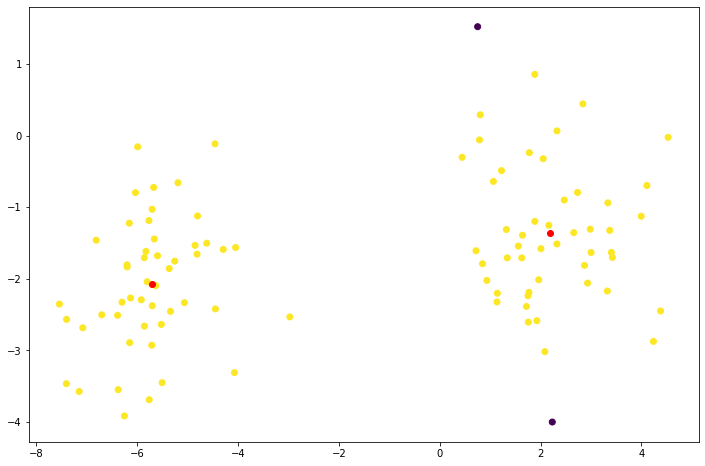

In [46]:
f_model=IsolationForest(contamination = 0.02)#On supporse qu'il ya 2% de contamination dans mon dataset
f_model.fit(x)
print(f_model.predict(x))
plt.figure(figsize=(12, 8))
plt.scatter(x[:, 0], x[:, 1], c=f_model.predict(x))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')


Donc pour avoir un meilleur score il faut supprimer les points qui sont en violet pour avoir un meilleur score et une meilleur prédiction

In [434]:
x_new = x[ f_model.predict(x) != -1]

/Users/amine/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Le score est de : 327.5624275728707 


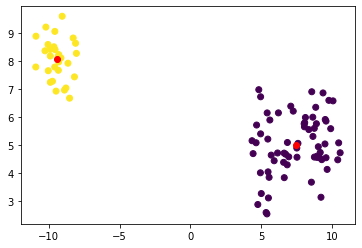

In [435]:
model=KMeans(n_clusters=2).fit(x_new)
plt.scatter(x_new[:, 0], x_new[:, 1], c=model.predict(x_new))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
print(f"Le score est de : {model.inertia_} ")

### 7.1.3 Application Décontamination Digits (img)

In [62]:
from sklearn.datasets import load_digits

In [63]:
digits= load_digits()
images=digits.images
x_img, y_img = digits.data, digits.target

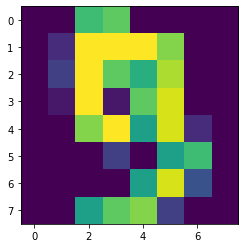

In [64]:
plt.imshow(images[9])

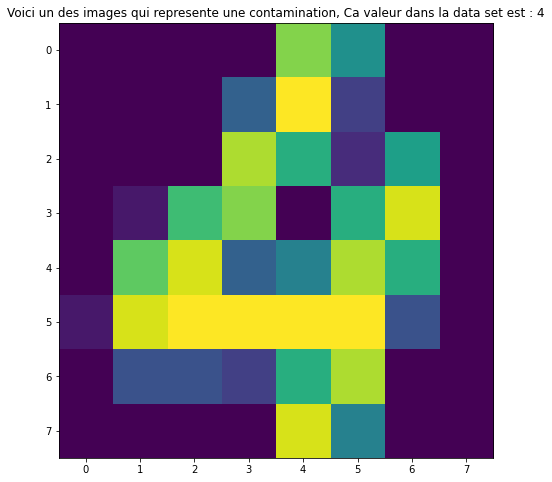

In [74]:
#Detéction des outliers
im_model=IsolationForest(contamination = 0.02)#On supporse qu'il ya 2% de contamination dans mon dataset
im_model.fit(x_img)
outliers = (im_model.predict(x_img) == -1)
outliers_img =images[outliers]

#Affichage de 1 des images qui represente une contamination pour la dataset
plt.figure(figsize=(10, 8))
plt.imshow(outliers_img[-1])#Affichage de la deriniere image qui compte comme une anomalie
plt.title(f"Voici un des images qui represente une contamination, Ca valeur dans la data set est : {y_img[outliers][-1]}")
plt.show()

## 7.2 Visualisation du dataset - Réduction des dimenssions des données
Algorithme analyse en composante principale (ACP): sont principe est de *réduire* la **Complexité superflue** d'un dataset en projetant ses données dans un espace de plus petite dimension(un espace avec moins de variable).
Avantage:

- Le but est d'accélérer l'apprentissage de la machine.
- Lutter contre un phénomène appelé le fléau de la dimension.

Poins de vue mathématique:
1. Calcule la matrice de covariance des données.
2. détermine les vecteurs propres de cette matrice : ce sont les composantes principales.
3. projette les données sur les axes.

Le but est de minimiser la dimension toute en conservant le maximum de variance


### 7.2.1 Visualisation de la dataset - Nombre de compossantes = ( 2 ou 3 )

In [440]:
from sklearn.decomposition import PCA
model_cpa=PCA(n_components=2)
x_reduced=model_cpa.fit_transform(x_img)

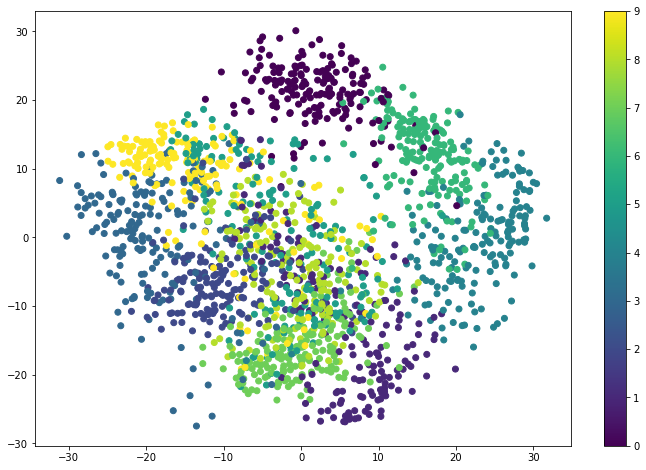

In [441]:
plt.figure(figsize=(12,8))
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=y_img)
plt.colorbar()
plt.show()

### 7.2.2 Entrainement de la dataset (Choix de nombre de composantes en fonction de la variance)

In [145]:
from sklearn.decomposition import PCA
model_cpa=PCA(n_components=64)
x_reduced=model_cpa.fit_transform(x_img)

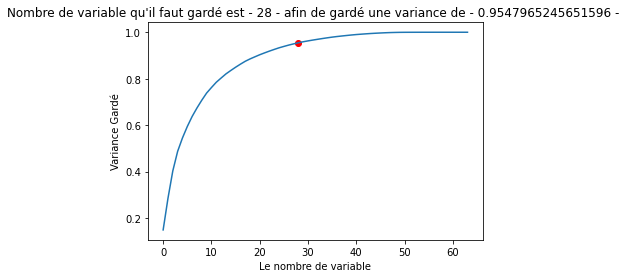

In [146]:
variance=np.cumsum(model_cpa.explained_variance_ratio_)
plt.plot(variance)
plt.xlabel('Le nombre de variable')
plt.ylabel('Variance Gardé')
#J'aimerai gardé un minimum de 95% de variance
variance_garde = (np.where(variance == variance[variance >= 0.95][0])[0][0], variance[variance >= 0.95][0])
plt.title(f"Nombre de variable qu'il faut gardé est - {variance_garde[0]} - afin de gardé une variance de - {variance_garde[1]} - ")
plt.scatter(variance_garde[0], variance_garde[1], c='red')

Recalcul de CPA avec n_composant=28

In [148]:
from sklearn.decomposition import PCA
model_cpa=PCA(n_components=28)
x_reduced=model_cpa.fit_transform(x_img)

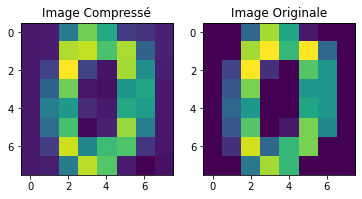

In [149]:
images_cpa = model_cpa.inverse_transform(x_reduced)
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(images_cpa[0,:].reshape(8, 8))
plt.title('Image Compressé')
plt.subplot(1, 2, 2)
plt.imshow(x_img[0,:].reshape(8, 8))
plt.title('Image Originale')
plt.show()

On Remarque que l'image a gardé ces caractéristique et resemble toujours a un 0.

CPA est utilisé frequement dans le cas ou la dataset est linéaire + continu. ce n'est pas notre cas dans les images.